In [1]:
import pandas as pd

In [2]:
df_personal = pd.read_csv('application_record.csv')
df_credit = pd.read_csv('credit_record.csv')

In [3]:
df_personal.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
df_personal.shape

(438557, 18)

In [5]:
df_personal.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [6]:
df_personal.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [7]:
display(df_credit.head())
df_credit.info()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [8]:
df = pd.merge(df_personal, df_credit, on='ID', how='inner')

In [9]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [10]:
df = df.sort_values(by=['ID', 'MONTHS_BALANCE'])

<b>STATUS column explained:</b>
<br>
0: 1-29 days past due <br>
1: 30-59 days past due <br>
2: 60-89 days overdue <br>
3: 90-119 days overdue <br>
4: 120-149 days overdue <br>
5: Overdue or bad debts, write-offs for more than 150 days <br>
C: paid off that month <br>
X: No loan for the month <br>

<b>After a brief google search I have found the following information:</b> <br>
In the financial industry, payment overdue by 30 days or more is typically considered a risk, and the risk escalates as the overdue period increases. 60 to 90 days overdue is particularly risky, and anything over 90 days is considered high risk, often leading to defaults and charge-offs. Institutions assess these thresholds to make decisions about collections, write-offs, and future lending risk. <br>
<br>
We will consider 60 days to be our cutoff, this should help us to reduce the number of false positives (compared to 30 days cutoff), and at the same time wil allow to intervene early enough (compared to 90 days). <br>

In [11]:
#assigning numeric values to new "risk" column
df['payment_overdue'] = df['STATUS'].isin(['2', '3', '4', '5']).astype(int)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,payment_overdue
15,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-15,X,0
14,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-14,0,0
13,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-13,1,0
12,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-12,C,0
11,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-11,C,0


In [12]:
df['STATUS'][df['payment_overdue'] == 1].value_counts()

5    1527
2     801
3     286
4     214
Name: STATUS, dtype: int64

In [13]:
df['payment_overdue'].value_counts()

0    774887
1      2828
Name: payment_overdue, dtype: int64

From the above we can see that out data is quite inbalanced which we will have to handle later

In [14]:
print('Number of unique IDs: ',df['ID'].nunique())
print('Total number of IDs: ',df['ID'].count())


Number of unique IDs:  36457
Total number of IDs:  777715


In [15]:
df = df.drop(columns=['STATUS'])

In [16]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
MONTHS_BALANCE           int64
payment_overdue          int32
dtype: object

Let's transform to df where each client ID will have only one corresponding row with data.

In [17]:
numeric_columns = df.select_dtypes(include=['float64', 'int32', 'int64']).columns

categorical_columns = df.select_dtypes(include=['object']).columns

agg_funcs = {col: 'mean' for col in numeric_columns} 
agg_funcs.update({col: 'last' for col in categorical_columns})  

agg_df = df.groupby('ID').agg(agg_funcs)
agg_df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,payment_overdue,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
ID,,,,,,,,,,,,,,,,,,,,
5008804,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,-7.5,0.0,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,None
5008805,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0,-7.0,0.0,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,None
5008806,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,-14.5,0.0,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff
5008808,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,-2.0,0.0,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
5008809,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,-24.0,0.0,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff


In [18]:
agg_df.shape

(36457, 20)

In [19]:
agg_df['payment_overdue'].describe()

count    36457.000000
mean         0.002741
std          0.033069
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.951220
Name: payment_overdue, dtype: float64

As we can see above, our "payment_overdue" column turned into a mean value of each 0 or 1 for the each historical month. <br>
Let's set the "risk" cutoff at 2 x standard deviation.

In [20]:
agg_df['risk'] = (agg_df['payment_overdue'] >= 0.066).astype(int)


In [21]:
agg_df['risk'].value_counts()

0    36111
1      346
Name: risk, dtype: int64

Data cleaning and visualisation

In [22]:
agg_df['OCCUPATION_TYPE'].isna().sum()

11323

We see that many clients don't have the occupation value, the number is too big to be dropped, so let's replace with the most common one

In [23]:
agg_df['OCCUPATION_TYPE'].value_counts()

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: OCCUPATION_TYPE, dtype: int64

In [24]:
agg_df.fillna({'OCCUPATION_TYPE': "Laborers"} , inplace=True)

In [25]:
agg_df['Years_employed'] = (agg_df['DAYS_EMPLOYED'] // 365).round(1)
agg_df.drop(columns='DAYS_EMPLOYED',inplace=True)

In [26]:
agg_df['CNT_FAM_MEMBERS'].value_counts()


2.0     19463
1.0      6987
3.0      6421
4.0      3106
5.0       397
6.0        58
7.0        19
15.0        3
9.0         2
20.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

In [27]:
def convert_family_size(value):
    if value == 1.0:
        return "1"
    elif value == 2.0:
        return "2"
    elif value == 3.0:
        return "3"
    else: 
        return "4 or more"

agg_df['family_size'] = agg_df['CNT_FAM_MEMBERS'].apply(convert_family_size)

agg_df.drop(axis=1, columns=['CNT_FAM_MEMBERS'], inplace=True)
agg_df['family_size'].value_counts()

2            19463
1             6987
3             6421
4 or more     3586
Name: family_size, dtype: int64

In [28]:
import plotly.express as px

fig = px.box(agg_df, x="CODE_GENDER", y="AMT_INCOME_TOTAL", 
             title="Income Distribution by Gender", 
             labels={"CODE_GENDER": "Gender", "AMT_INCOME_TOTAL": "Total Income"})
fig.show()

In [29]:
agg_df['AGE'] = agg_df['DAYS_BIRTH'] // -365  # Convert days to years

fig = px.scatter(agg_df, x="AGE", y="AMT_INCOME_TOTAL", 
                 color="CODE_GENDER", 
                 title="Age vs. Total Income", 
                 labels={"AGE": "Age", "AMT_INCOME_TOTAL": "Total Income"})
fig.show()


In [30]:
fig = px.pie(agg_df, names="NAME_INCOME_TYPE", 
             title="Proportion of Income Types", 
             hole=0.3)  
fig.show()

In [31]:
agg_df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,MONTHS_BALANCE,payment_overdue,...,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,risk,Years_employed,family_size,AGE
ID,,,,,,,,,,,,,,,,,,,,,
5008804,5008804,0,427500.0,-12005,1,1,0,0,-7.5,0.0,...,Y,Working,Higher education,Civil marriage,Rented apartment,Laborers,0,-13,2,32
5008805,5008805,0,427500.0,-12005,1,1,0,0,-7.0,0.0,...,Y,Working,Higher education,Civil marriage,Rented apartment,Laborers,0,-13,2,32
5008806,5008806,0,112500.0,-21474,1,0,0,0,-14.5,0.0,...,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff,0,-4,2,58
5008808,5008808,0,270000.0,-19110,1,0,1,1,-2.0,0.0,...,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,-9,1,52
5008809,5008809,0,270000.0,-19110,1,0,1,1,-24.0,0.0,...,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,-9,1,52


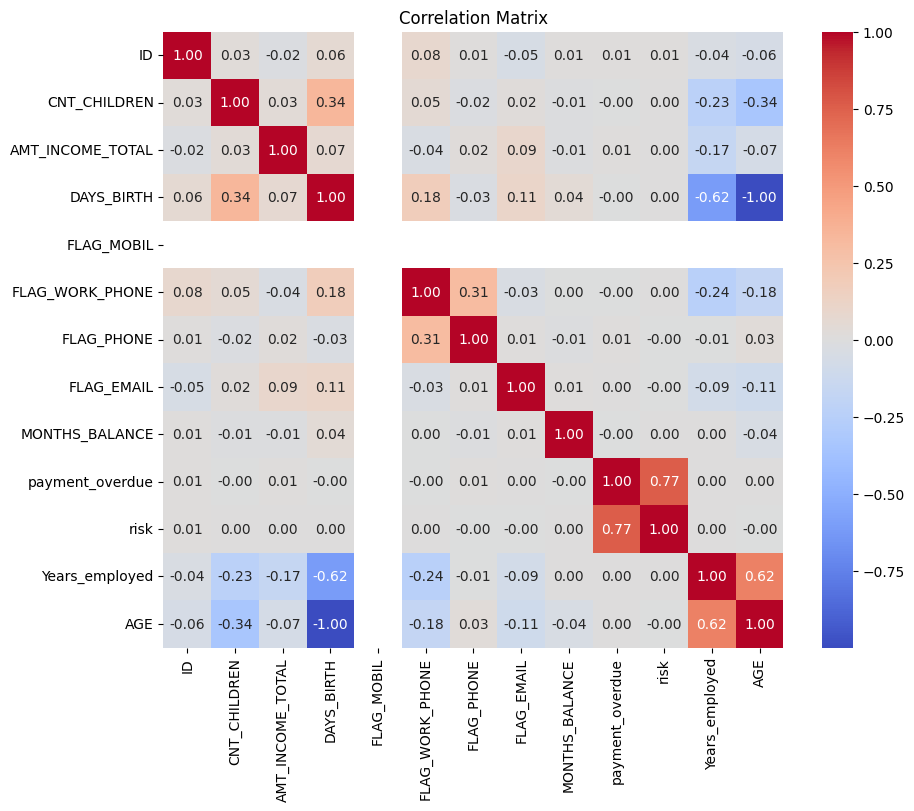

In [32]:
#Exploring the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = agg_df.corr()


plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()


In [33]:
df['FLAG_MOBIL'].nunique()

1

Based on the correlation matrix we can see that some of the columns are highly correlated, and taht some are not bringinmg value to our data - let's drop the unnecessary ones

In [34]:
columns_to_drop = ['DAYS_BIRTH','FLAG_MOBIL','payment_overdue', 'CNT_CHILDREN']  

agg_df = agg_df.drop(columns=columns_to_drop)


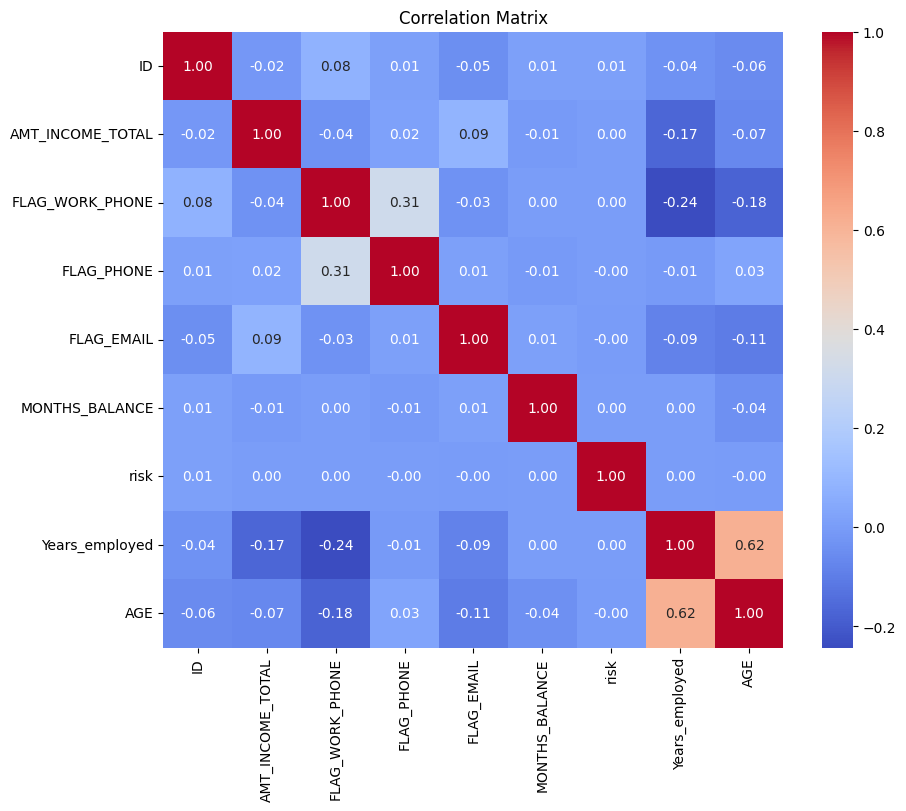

In [35]:

corr_matrix = agg_df.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'Histogram of AMT_INCOME_TOTAL')

<Figure size 1200x600 with 0 Axes>

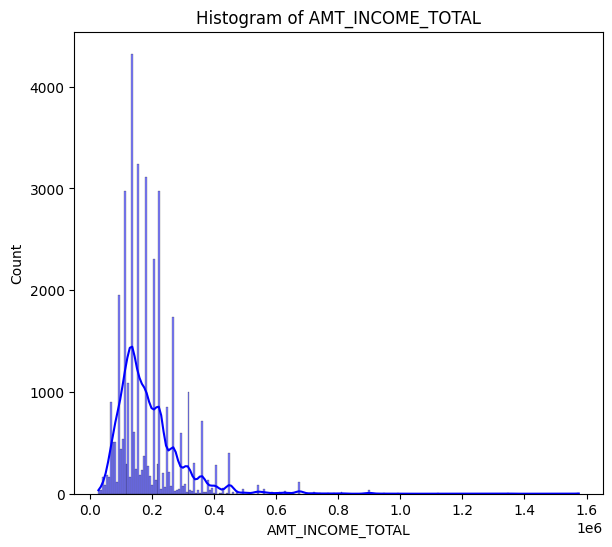

In [36]:
plt.figure(figsize=(12, 6))

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(agg_df['AMT_INCOME_TOTAL'], kde=True, color='blue')
plt.title('Histogram of AMT_INCOME_TOTAL')

In [37]:
#searching outliers
column_name = 'AMT_INCOME_TOTAL'


Q1 = agg_df[column_name].quantile(0.25)
Q3 = agg_df[column_name].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.7 * IQR
upper_bound = Q3 + 1.7 * IQR

outliers = agg_df[(agg_df[column_name] < lower_bound) | (agg_df[column_name] > upper_bound)]

agg_df = agg_df[(agg_df['AMT_INCOME_TOTAL'] >= lower_bound) & (agg_df['AMT_INCOME_TOTAL'] <= upper_bound)]

Text(0.5, 1.0, 'Histogram of AMT_INCOME_TOTAL')

<Figure size 1200x600 with 0 Axes>

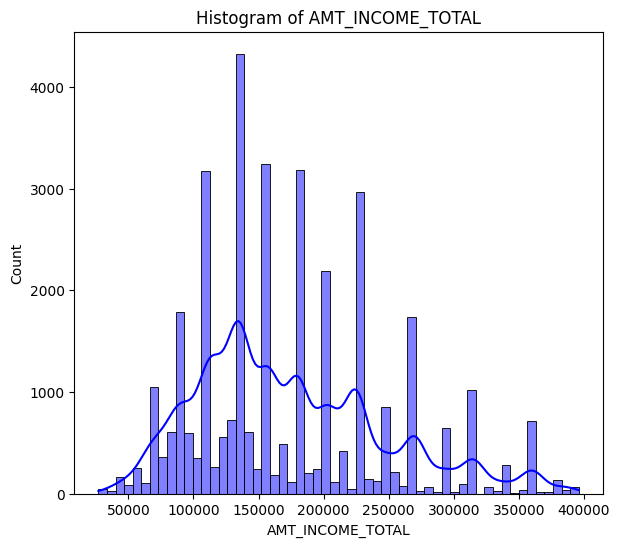

In [38]:
plt.figure(figsize=(12, 6))

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(agg_df['AMT_INCOME_TOTAL'], kde=True, color='blue')
plt.title('Histogram of AMT_INCOME_TOTAL')

Text(0.5, 1.0, 'Histogram of AMT_INCOME_TOTAL')

<Figure size 1200x600 with 0 Axes>

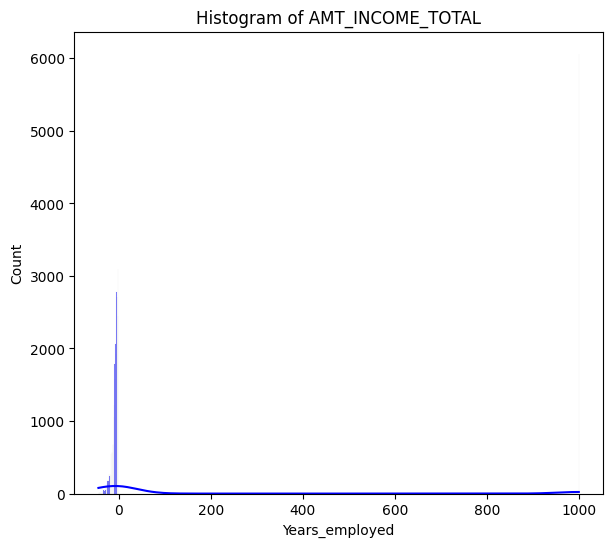

In [39]:
plt.figure(figsize=(12, 6))

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(agg_df['Years_employed'], kde=True, color='blue')
plt.title('Histogram of AMT_INCOME_TOTAL')

In [40]:
column_name = 'Years_employed'

Q1 = agg_df[column_name].quantile(0.25)
Q3 = agg_df[column_name].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.7 * IQR
upper_bound = Q3 + 1.7 * IQR

outliers = agg_df[(agg_df[column_name] < lower_bound) | (agg_df[column_name] > upper_bound)]

agg_df = agg_df[(agg_df['Years_employed'] >= lower_bound) & (agg_df['Years_employed'] <= upper_bound)]

Text(0.5, 1.0, 'Histogram of AMT_INCOME_TOTAL')

<Figure size 1200x600 with 0 Axes>

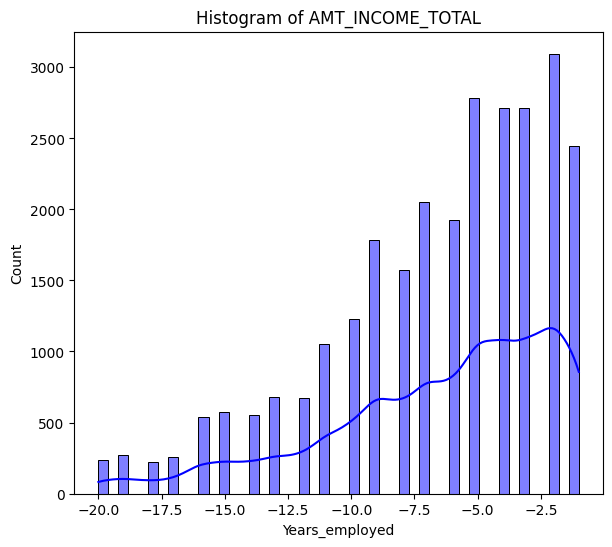

In [41]:
plt.figure(figsize=(12, 6))

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(agg_df['Years_employed'], kde=True, color='blue')
plt.title('Histogram of AMT_INCOME_TOTAL')

In [42]:
#replacing negative numbers
agg_df[['AGE', 'Years_employed', 'MONTHS_BALANCE']] = agg_df[['AGE', 'Years_employed', 'MONTHS_BALANCE']] * -1

In [43]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,payment_overdue
15,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15,0
14,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14,0
13,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-13,0
12,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-12,0
11,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-11,0


In [44]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler

categorical_nominal = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE' ]  # Example nominal categories
categorical_ordinal = ['NAME_EDUCATION_TYPE', 'family_size' ]  
numerical_features = ["AMT_INCOME_TOTAL", "AGE", "Years_employed", "MONTHS_BALANCE"] 

one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(agg_df[categorical_nominal]),
                               columns=one_hot_encoder.get_feature_names_out(categorical_nominal),
                               index=agg_df.index)

ordinal_encoder = OrdinalEncoder()
agg_df[categorical_ordinal] = ordinal_encoder.fit_transform(agg_df[categorical_ordinal])

scaler = MinMaxScaler()
scaled_numerical = pd.DataFrame(scaler.fit_transform(agg_df[numerical_features]),
                                columns=numerical_features,
                                index=agg_df.index)

agg_df_transformed = pd.concat([scaled_numerical, one_hot_encoded, agg_df.drop(columns=categorical_nominal + numerical_features)], axis=1)


C:\Users\lubov\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [45]:
agg_df_transformed.drop(columns=['ID'])

,AMT_INCOME_TOTAL,AGE,Years_employed,MONTHS_BALANCE,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,CODE_GENDER_M,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,...,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,NAME_EDUCATION_TYPE,risk,family_size
ID,,,,,,,,,,,,,,,,,,,,,
5008806,0.231707,0.173913,0.157895,0.243697,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,4.0,0,1.0
5008808,0.658537,0.304348,0.421053,0.033613,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,1,1,4.0,0,0.0
5008809,0.658537,0.304348,0.421053,0.403361,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,1,1,4.0,0,0.0
5008810,0.658537,0.304348,0.421053,0.218487,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,1,1,4.0,0,0.0
5008811,0.658537,0.304348,0.421053,0.319328,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,1,1,4.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,0.353659,0.804348,0.210526,0.327731,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,4.0,0,2.0
5150483,0.353659,0.804348,0.210526,0.142857,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,4.0,0,2.0
5150484,0.353659,0.804348,0.210526,0.100840,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,4.0,0,2.0


Dealing with class imbalance with SMOTE

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = agg_df_transformed.drop(columns=['risk'])  
y = agg_df_transformed['risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())


Class distribution before SMOTE:
0    18976
1      192
Name: risk, dtype: int64

Class distribution after SMOTE:
0    18976
1    18976
Name: risk, dtype: int64


In [47]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37952 entries, 0 to 37951
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   AMT_INCOME_TOTAL                         37952 non-null  float64
 1   AGE                                      37952 non-null  float64
 2   Years_employed                           37952 non-null  float64
 3   MONTHS_BALANCE                           37952 non-null  float64
 4   FLAG_OWN_CAR_Y                           37952 non-null  float64
 5   FLAG_OWN_REALTY_Y                        37952 non-null  float64
 6   CODE_GENDER_M                            37952 non-null  float64
 7   NAME_INCOME_TYPE_Pensioner               37952 non-null  float64
 8   NAME_INCOME_TYPE_State servant           37952 non-null  float64
 9   NAME_INCOME_TYPE_Student                 37952 non-null  float64
 10  NAME_INCOME_TYPE_Working                 37952

Training the model

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 



In [49]:
models = {
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=300),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(),
    "KNN": KNeighborsClassifier(weights='distance')  
}

In [50]:
X_train_val, X_cv, y_train_val, y_cv = train_test_split(X_train_resampled, y_train_resampled, random_state=42, test_size=0.1)

In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

def train_and_evaluate_model(model, X_train_val, y_train_val, kf, model_name):

    fold_accuracies, fold_recalls, fold_precisions, fold_f1s = [], [], [], []
    all_y_true, all_y_pred = [], []
    
    for train_idx, val_idx in kf.split(X_train_val):
        X_train_fold, X_val_fold = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]
        
        model.fit(X_train_fold, y_train_fold)
        
        y_val_pred = model.predict(X_val_fold)
        
        all_y_true.extend(y_val_fold)
        all_y_pred.extend(y_val_pred)
        
        fold_accuracies.append(accuracy_score(y_val_fold, y_val_pred))
        fold_recalls.append(recall_score(y_val_fold, y_val_pred, average="binary"))
        fold_precisions.append(precision_score(y_val_fold, y_val_pred, average="binary"))
        fold_f1s.append(f1_score(y_val_fold, y_val_pred, average="binary"))
    
    accuracy = np.mean(fold_accuracies)
    recall = np.mean(fold_recalls)
    precision = np.mean(fold_precisions)
    f1 = np.mean(fold_f1s)
    cm = confusion_matrix(all_y_true, all_y_pred)
    
    return {
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }

def compare_models(models, X_train_val, y_train_val, n_splits=5):

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    results = {}
    models_trained = {}
    
    for model_name, model in models.items():
        print(f"Training and evaluating: {model_name}")
        
        if model_name == "XGBClassifier":
            X_train_val = X_train_val.apply(pd.to_numeric, errors='coerce')
        
        model_results = train_and_evaluate_model(model, X_train_val, y_train_val, kf, model_name)
        
        results[model_name] = model_results
        
        print(f"Accuracy: {model_results['Accuracy']:.4f}")
        print(f"Recall: {model_results['Recall']:.4f}")
        print(f"Precision: {model_results['Precision']:.4f}")
        print(f"F1 Score: {model_results['F1 Score']:.4f}")
        print("Confusion Matrix:")
        print(model_results["Confusion Matrix"])
        print("-" * 50)
    
    best_model_name = max(results.items(), key=lambda x: x[1]["F1 Score"])[0]
    print(f"Best Model: {best_model_name}")
    print("Metrics:")
    print(results[best_model_name])



compare_models(models, X_train_val, y_train_val)


Training and evaluating: DecisionTreeClassifier
Accuracy: 0.9904
Recall: 0.9914
Precision: 0.9894
F1 Score: 0.9904
Confusion Matrix:
[[16906   181]
 [  146 16923]]
--------------------------------------------------
Training and evaluating: RandomForestClassifier
Accuracy: 0.9951
Recall: 0.9930
Precision: 0.9973
F1 Score: 0.9951
Confusion Matrix:
[[17041    46]
 [  120 16949]]
--------------------------------------------------
Training and evaluating: XGBClassifier
Accuracy: 0.9950
Recall: 0.9924
Precision: 0.9975
F1 Score: 0.9949
Confusion Matrix:
[[17044    43]
 [  129 16940]]
--------------------------------------------------
Training and evaluating: KNN
Accuracy: 0.8364
Recall: 0.8263
Precision: 0.8432
F1 Score: 0.8346
Confusion Matrix:
[[14465  2622]
 [ 2965 14104]]
--------------------------------------------------
Best Model: RandomForestClassifier
Metrics:
{'Accuracy': 0.9951399109720563, 'Recall': 0.9929709598140292, 'Precision': 0.9972906259252889, 'F1 Score': 0.99512532799634